### Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
import cv2
# import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import os
from cv2 import xfeatures2d
import time 
from sklearn.neighbors import KNeighborsClassifier
from pathlib import Path
from keras.preprocessing.image import load_img
import warnings
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
import cv2
import joblib
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.compat.v1.enable_v2_behavior()
# tf.disable_v2_behavior()
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import os
from cv2 import xfeatures2d
import keras
import time 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint   
import time


2023-07-29 19:41:06.420122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import torch
# import jovian
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

from PIL import Image
import glob

In [3]:
# pip install seaborn
# pip install torchvision

In [4]:
# pip install torchvision
# pip install keras
# pip install tensorflow

### Data

In [4]:
def image_to_array(images_folder):
    data = []
    label = []
    for i in range(10):
        for filename in glob.glob(images_folder + "/n{}/*.jpg".format(i)):
            im = Image.open(filename)
            im = im.resize((400,300))
            pixels = np.asarray(im).astype('float32')
            pixels /= 255.0
            data.append(pixels)
            label.append(i)
    data = np.array(data)
    label = np.array(label)
    return data,label

In [5]:
X_train,y_train = image_to_array("./data/monkey/training/training/")

In [6]:
X_test,y_test = image_to_array("./data/monkey/validation/validation/")

In [20]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1096, 300, 400, 3)
Shape of y_train: (1096,)
Shape of X_test: (272, 300, 400, 3)
Shape of y_test: (272,)


In [9]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
label_df = pd.read_csv(f"data/monkey/monkey_labels.txt", names=cols, skiprows=1)
labels = label_df['Common Name']
label_df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [10]:
print("Training set")
num_classes = len(np.unique(y_train))
num_per_class = np.zeros(num_classes)
for i in range(0, num_classes):
    num_per_class[i] = len(y_train == i)
    print("Class", i, "-", labels[i], ":", int(num_per_class[i]), "images")

print("_______________________________")
print("Testing set")
num_classes = len(np.unique(y_test))
num_per_class_test = np.zeros(num_classes)
for i in range(0, num_classes):
    num_per_class_test[i] = len(y_test == i)
    print("Class", i, "-", labels[i], ":", int(num_per_class_test[i]), "images")


Training set
Class 0 -  mantled_howler                 : 1096 images
Class 1 -  patas_monkey                   : 1096 images
Class 2 -  bald_uakari                    : 1096 images
Class 3 -  japanese_macaque               : 1096 images
Class 4 -  pygmy_marmoset                 : 1096 images
Class 5 -  white_headed_capuchin          : 1096 images
Class 6 -  silvery_marmoset               : 1096 images
Class 7 -  common_squirrel_monkey         : 1096 images
Class 8 -  black_headed_night_monkey      : 1096 images
Class 9 -  nilgiri_langur                 : 1096 images
_______________________________
Testing set
Class 0 -  mantled_howler                 : 272 images
Class 1 -  patas_monkey                   : 272 images
Class 2 -  bald_uakari                    : 272 images
Class 3 -  japanese_macaque               : 272 images
Class 4 -  pygmy_marmoset                 : 272 images
Class 5 -  white_headed_capuchin          : 272 images
Class 6 -  silvery_marmoset               : 272 image

### Dataset visualization

In [11]:
def show_image(index):
    # Set the figure size
    plt.figure(figsize=(2, 2))

    # Get the image and label
    image = X_train[index]
    label = y_train[index]

    # Plot the image
    plt.imshow(image)
    plt.title(labels[label])
    plt.axis('off')
    plt.show()

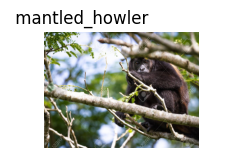

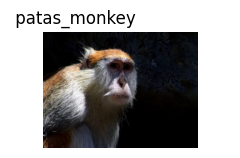

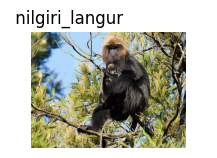

In [12]:
show_image(3)
show_image(200)
show_image(1000)

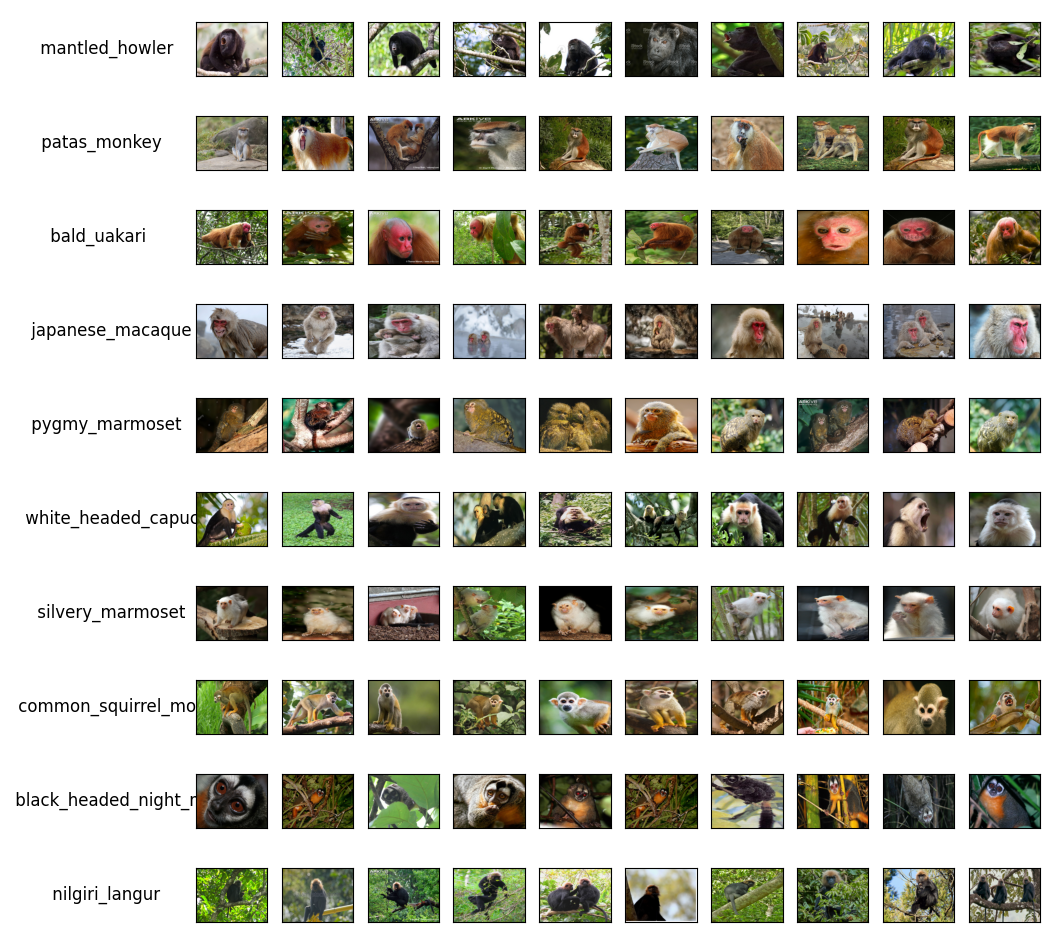

In [93]:
fig, ax = plt.subplots(nrows=num_classes, ncols=11, figsize=(12, 12))

for i in range(0, num_classes):
    indices = np.where(y_train == i)[0]
    indices = indices[:10] # first 10 images belonging to i-th class 
    for j in range(0, 10):
        img = X_train[indices[j], :, :, :]
        ax[i, j+1].imshow(img)
        ax[i, j+1].set_xticks([]); ax[i, j+1].set_yticks([])
        ax[i, j+1].set_xticklabels([]); ax[i, j+1].set_yticklabels([])
    ax[i, 0].text(0.5, 0.5, labels[i], fontsize=12, ha='center', va='center')
    ax[i, 0].set_xticks([]); ax[i, 0].set_yticks([])
    ax[i, 0].set_xticklabels([]); ax[i, 0].set_yticklabels([])

    # remove frame of the plot by setting spines visibility to False
    for spine in ax[i, 0].spines.values():
        spine.set_visible(False)

plt.show()

### "Traditional" feature extraction methods: 1. colour histogram

### "Traditional" feature extraction methods: 2. Scale Invariant Feature Transform - SIFT

https://github.com/deepanshut041/feature-detection/blob/master/sift/sift.ipynb


SIFT is an algorithm that identifies keypoints and computes their corresponding descriptors. Keypoints represent points of interest in an image, and descriptors capture the local features by extracting small, fixed-size (128) patches (converted into vectors) around each keypoint, describing the surrounding area.

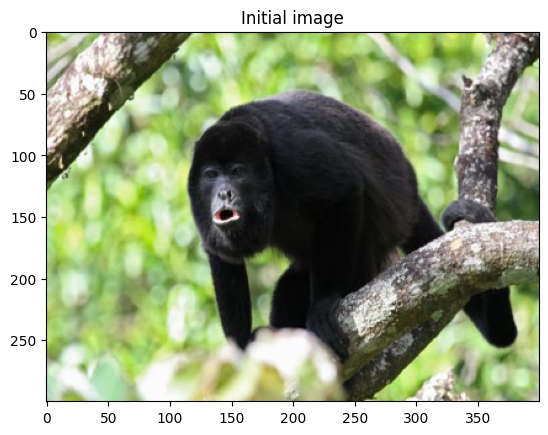

Number of Keypoints Detected In The Training Image:  888


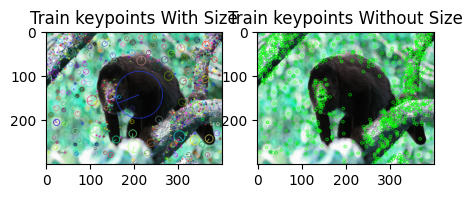

In [7]:
def sift(index):
    plt.imshow(X_train[index])
    plt.title("Initial image")
    plt.show()
    training_image  = X_train[index]
    

    # had to add this as detectAndCompute ONLY ACCEPTS IMAGES W/ 8 BIT integer values
    training_image = cv2.normalize(training_image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    #  converting image to RGB
    training_image = cv2.cvtColor(training_image, cv2.COLOR_BGR2RGB)
    # converting to gray scale
    training_image_gray = cv2.cvtColor(training_image,cv2.COLOR_RGB2GRAY)

    # detecting keypoints
    sift = cv2.SIFT_create()
    train_keypoints, train_descriptor = sift.detectAndCompute(training_image_gray, None)
    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display image with and without keypoints size
    fx, plots = plt.subplots(1, 2, figsize=(5,5))

    plots[0].set_title("Train keypoints With Size")
    plots[0].imshow(keypoints_with_size, cmap='gray')

    plots[1].set_title("Train keypoints Without Size")
    plots[1].imshow(keypoints_without_size, cmap='gray')

    # Print the number of keypoints detected in the training image
    print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))
    # print(train_keypoints)
    # print(train_descriptor)
    # print(train_descriptor.shape)

sift(2)

In [107]:
from sklearn.cluster import KMeans
import time

def generate_vocabulary(n_images, no_clusters):

    # list_of_all_descriptors: list of numpy arrays such that each element of the list - 2D numpy array 
    # corresponds to descriptors of the one training image
    # descriptor matrix of one image: (#keypoints x 128)

    print("SIFT feature extraction begins...")
    start_time = time.time()
    X_train_subset = X_train[:n_images]
    sift = cv2.SIFT()
    list_of_all_descriptors = []

    for i in range(0, n_images):
        img = X_train_subset[i]
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting image to RGB (not necessary since it's already in RGB)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # converting to gray scale

        # detecting keypoints
        sift = cv2.SIFT_create()
        train_keypoints, train_descriptor = sift.detectAndCompute(img, None)
        list_of_all_descriptors.append(train_descriptor)  

    print("Time taken for SIFT feature extraction:", time.time() - start_time)

    # converting into 2D numpy array (vertical stacking of the list elements): mat_of_all_descriptors

    print ("Stacking begins...")
    mat_of_all_descriptors = np.array(list_of_all_descriptors[0])
    for remaining in list_of_all_descriptors[1:]:
        if remaining is not None:                   # THINK ABOUT THIS PART A BIT MORE!!!!!!!!!!!!!!!!!!
            # IT HAS HAPPENED THAT SIFT DETECTOR DOESN'T DETECT ANY KEYPOINTS -> EXCLUDE EMPTY LISTS
            # IMAGE NUMBER 906 IS PROBLEMATIC FOR E.G
            # I THINK THAT EVERYTHING IS OK NOW (WITH SMALL EDGE CASE IN histogram_creation)
            mat_of_all_descriptors = np.vstack((mat_of_all_descriptors, remaining))
    print ("Stacking done")

    # perform clustering: K-means algorithm

    start_time = time.time()
    print("Starting with clustering...")
    kmeans_obj = KMeans(no_clusters)
    kmeans_ret = kmeans_obj.fit_predict(mat_of_all_descriptors) # fitting the model: class label assigned to each descriptor
    # centroids = kmeans_obj.cluster_centers_
    print("Clustering completed!")
    print("Time taken for clustering:", time.time() - start_time)

    return list_of_all_descriptors, kmeans_obj

In [123]:
def histogram_creation(descriptor_list, kmeans_obj):

    n_images = len(descriptor_list)
    kmeans_ret = kmeans_obj.labels_
    no_clusters = len(kmeans_obj.cluster_centers_)


    mega_histogram = np.array([np.zeros(no_clusters) for _ in range(n_images)])  # #n_images x #no_clusters
    old_count = 0
    for i in range(n_images):
        if descriptor_list[i] is None:
            continue 
        l = len(descriptor_list[i])
        for j in range(l):
            idx = kmeans_ret[old_count+j]
            mega_histogram[i][idx] += 1
        old_count += l
    print ("Vocabulary Histogram Generated")

    return mega_histogram

In [110]:
list_of_all_descriptors, kmeans_obj = generate_vocabulary(n_images=100, no_clusters=15)

SIFT feature extraction begins...
Time taken for SIFT feature extraction: 3.31900691986084
Stacking begins...
Stacking done
Starting with clustering...
Clustering completed!
Time taken for clustering: 35.63438677787781


In [113]:
mega_histogram = histogram_creation(descriptor_list=list_of_all_descriptors, kmeans_obj=kmeans_obj)

Vocabulary Histogram Generated


### Histogram: results inspection

### KNN Train and Test

In [114]:
def train_knn(X, y, k):
    start_time = time.time()
    print("Starting with training of KNN model...")
    knn_model = KNeighborsClassifier(k)
    knn_model.fit(X, y)
    print("Training completed!")
    print ("Time taken in training {0}".format((time.time() - start_time)))
    return knn_model

In [124]:
def recognize(model, kmeans_obj, test_img):
    sift = cv2.SIFT_create()
    test_img = cv2.normalize(test_img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    img_keypoints, img_desc = sift.detectAndCompute(test_img, None)
    
    no_clusters = kmeans_obj.n_clusters
    vocab = np.array( [[ 0 for i in range(no_clusters)]])
    if img_desc is not None:
        test_ret = kmeans_obj.predict(img_desc)
        for each in test_ret:
            vocab[0][each] +=1
        lb = model.predict(vocab)
        return lb
    else:
        lb = np.array([-1000])
        return lb

def test_model(model, kmeans_obj, x_test):
    predictions = []
    start_time = time.time()
    print ("Testing started ..")
    for image in x_test:
        cl = recognize(model, kmeans_obj, image)
        predictions.append(cl)
    print ("Testing completed")
    print ("Time taken in testing - {0}".format((time.time() - start_time)))
    return np.array(predictions)

def test_model_train_set(model, mega_histogram): 
    # there is no need to test the training set in the same way as test (mega_histogram is saved)
    start_time = time.time()
    print ("Testing started ..")
    predictions = model.predict(mega_histogram)
    print ("Testing completed")
    print ("Time taken in testing - {0}".format((time.time() - start_time)))
    return np.array(predictions)

In [126]:
def evaluate_model(y_train_pred, y_test_pred, k):
    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    if (len(np.unique(y_train_pred))==10):
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    if (len(np.unique(y_test_pred))==10):
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")
    
    plt.tight_layout()
    plt.suptitle("k-NN classifier, k = " + str(k), fontsize=15, ha='center')
    plt.subplots_adjust(top=0.85)

    plt.show()

### no_clusters = 10

In [120]:
list_of_all_descriptors, kmeans_obj = generate_vocabulary(n_images=X_train.shape[0], no_clusters=10)
mega_histogram = histogram_creation(descriptor_list=list_of_all_descriptors, kmeans_obj=kmeans_obj)
# 10 mins

SIFT feature extraction begins...
Time taken for SIFT feature extraction: 43.01327109336853
Stacking begins...
Stacking done
Starting with clustering...
Clustering completed!
Time taken for clustering: 367.3715331554413
Vocabulary Histogram Generated


In [121]:
# save the current model
with open('mega_histogram_train_10_monkey.txt', 'wb') as f:
    np.save(f, mega_histogram)
joblib.dump(kmeans_obj, 'kmeans_model_10_monkey.pkl')


with open('mega_histogram_train_10_monkey.txt', 'rb') as f:
    mega_histogram = np.load(f)
kmeans_obj = joblib.load('kmeans_model_10_monkey.pkl')
no_clusters = kmeans_obj.n_clusters

Starting with training of KNN model...
Training completed!
Time taken in training 0.003665924072265625
Testing started ..
Testing completed
Time taken in testing - 13.45230484008789
Testing started ..
Testing completed
Time taken in testing - 0.25376224517822266
########################################
Accuracy on train:  0.6021897810218978
Accuracy on test:  0.29411764705882354
########################################
Recall on train:  0.6030897928564412
Recall on test:  0.2945909645909646
########################################
Precision on train:  0.6421426431995424
Precision on test:  0.33416931169336184
########################################


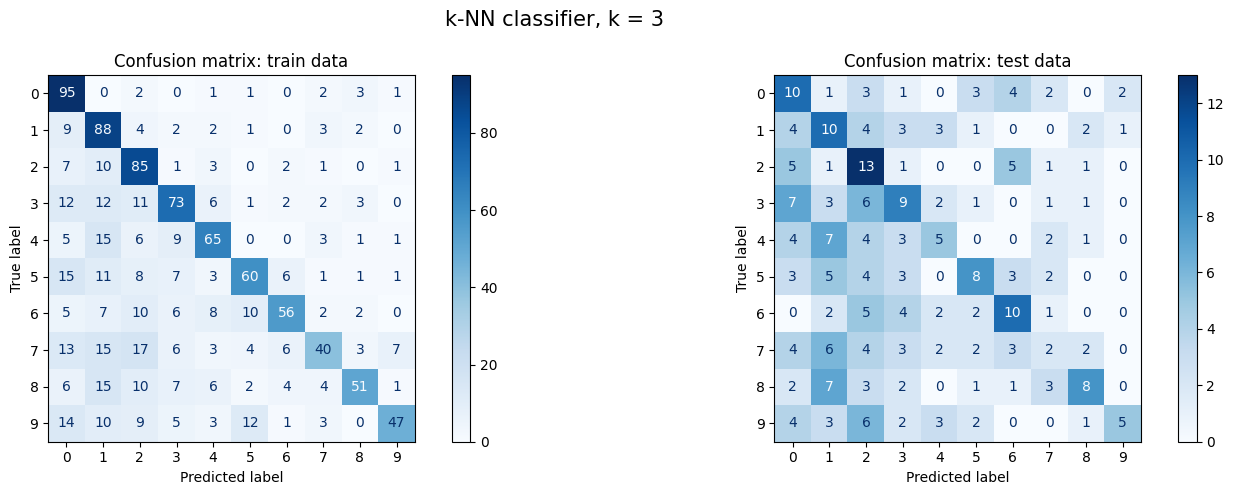

In [127]:
k = 3
knn_model = train_knn(mega_histogram, y_train, k)
y_test_pred = test_model(knn_model, kmeans_obj, X_test)
y_train_pred = test_model_train_set(knn_model, mega_histogram)
evaluate_model(y_train_pred, y_test_pred, k)

In [128]:
k_vect = np.array([3, 5, 7, 11, 15, 17])
acc_train_vect = np.zeros(len(k_vect))
acc_test_vect = np.zeros(len(k_vect))
for i in range(0, len(k_vect)):
    k = k_vect[i]
    print("k=", k)
    knn_model = train_knn(mega_histogram, y_train, k)
    y_test_pred = test_model(knn_model, kmeans_obj, X_test)
    y_train_pred = test_model_train_set(knn_model, mega_histogram)
    acc_train_vect[i] = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test_vect[i] = accuracy_score(y_true=y_test, y_pred=y_test_pred)

k= 3
Starting with training of KNN model...
Training completed!
Time taken in training 0.002017974853515625
Testing started ..
Testing completed
Time taken in testing - 9.954247236251831
Testing started ..
Testing completed
Time taken in testing - 0.11892199516296387
k= 5
Starting with training of KNN model...
Training completed!
Time taken in training 0.0012700557708740234
Testing started ..
Testing completed
Time taken in testing - 11.447356939315796
Testing started ..
Testing completed
Time taken in testing - 0.14307475090026855
k= 7
Starting with training of KNN model...
Training completed!
Time taken in training 0.0015418529510498047
Testing started ..
Testing completed
Time taken in testing - 12.3300621509552
Testing started ..
Testing completed
Time taken in testing - 0.1574268341064453
k= 11
Starting with training of KNN model...
Training completed!
Time taken in training 0.0016047954559326172
Testing started ..
Testing completed
Time taken in testing - 11.413044214248657
Testi

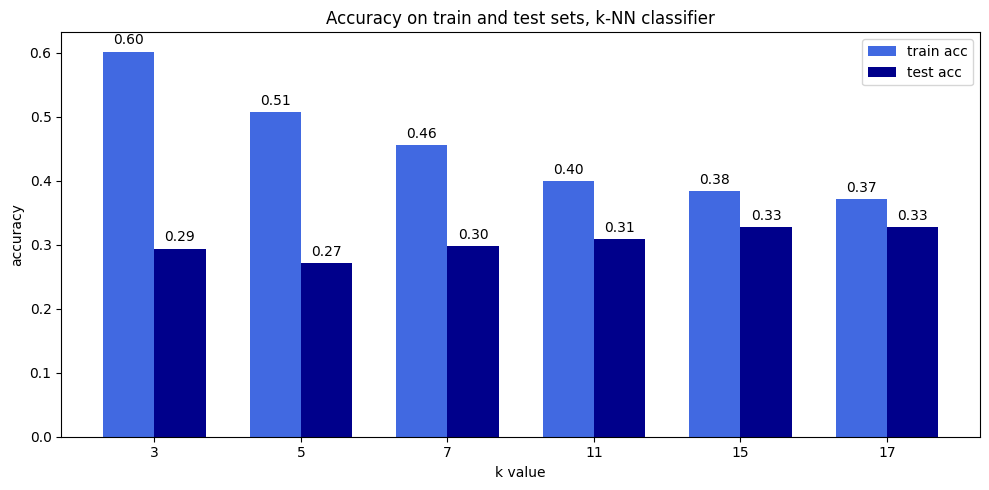

In [129]:
bar_width = 0.35
x_pos = range(len(k_vect))

fig, ax = plt.subplots(figsize=(10, 5))

train_bars = ax.bar(x_pos, acc_train_vect, width=bar_width, label='train acc', color='royalblue')
test_bars = ax.bar([pos + bar_width for pos in x_pos], acc_test_vect, width=bar_width, label='test acc', color='darkblue')

ax.set_xticks([pos + bar_width / 2 for pos in x_pos])
ax.set_xticklabels(k_vect)

ax.set_xlabel('k value')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy on train and test sets, k-NN classifier')
ax.legend()

# function to add text labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# add labels on top of the bars
add_labels(train_bars)
add_labels(test_bars)

plt.tight_layout()
plt.show()

### One vs Rest - SVM

In [130]:
def train_svm(X,Y, c):
    start_time = time.time()
    print("Starting training with model SVM...")
    svm_model = OneVsRestClassifier(SVC(kernel = 'linear',C = c)).fit(X,Y)
    print("Training completed!")
    print ("Time taken in training - {0}".format((time.time() - start_time)))
    return svm_model

def evaluate_model_svm(y_train_pred, y_test_pred, c):
    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    if (len(np.unique(y_train_pred))==10):
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    if (len(np.unique(y_test_pred))==10):
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")
    
    plt.tight_layout()
    plt.suptitle("SVM Classifier, c = " + str(c), fontsize=15, ha='center')
    plt.subplots_adjust(top=0.85)

    plt.show()

Starting training with model SVM...
Training completed!
Time taken in training - 40.444831132888794
Testing started ..
Testing completed
Time taken in testing - 18.96231698989868
Testing started ..
Testing completed
Time taken in testing - 0.21777105331420898
########################################
Accuracy on train:  0.14963503649635038
Accuracy on test:  0.15441176470588236
########################################
Recall on train:  0.1507004291535729
Recall on test:  0.15608669108669107
########################################
Precision on train:  0.17611743351262857
Precision on test:  0.19948719257899034
########################################


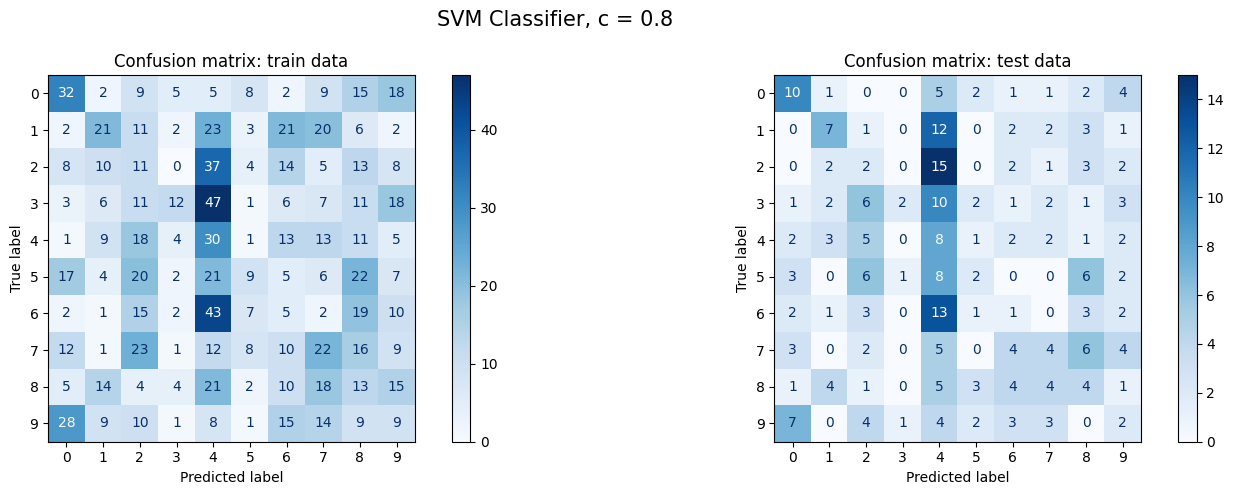

In [131]:
c = 0.8
svm_model = train_svm(mega_histogram, y_train, c)
y_test_pred = test_model(svm_model, kmeans_obj, X_test)
y_train_pred = test_model_train_set(svm_model, mega_histogram)
evaluate_model_svm(y_train_pred, y_test_pred,0.8 )
#1min

In [132]:
c_vect = np.array([0.2,0.5,0.8,1])
acc_train_vect_svm = np.zeros(len(c_vect))
acc_test_vect_svm = np.zeros(len(c_vect))
for i in range(0, len(c_vect)):
    c = c_vect[i]
    print("c=", c)
    svm_model = train_svm(mega_histogram, y_train, c)
    y_test_pred = test_model(svm_model, kmeans_obj, X_test)
    y_train_pred = test_model_train_set(svm_model, mega_histogram)
    acc_train_vect_svm[i] = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test_vect_svm[i] = accuracy_score(y_true=y_test, y_pred=y_test_pred)

# 2

c= 0.2
Starting training with model SVM...
Training completed!
Time taken in training - 7.853941917419434
Testing started ..
Testing completed
Time taken in testing - 13.460722208023071
Testing started ..
Testing completed
Time taken in testing - 0.16443109512329102
c= 0.5
Starting training with model SVM...
Training completed!
Time taken in training - 20.145243883132935
Testing started ..
Testing completed
Time taken in testing - 14.489691019058228
Testing started ..
Testing completed
Time taken in testing - 0.20278501510620117
c= 0.8
Starting training with model SVM...
Training completed!
Time taken in training - 32.69539403915405
Testing started ..
Testing completed
Time taken in testing - 27.79690194129944
Testing started ..
Testing completed
Time taken in testing - 0.31235313415527344
c= 1.0
Starting training with model SVM...
Training completed!
Time taken in training - 52.80723309516907
Testing started ..
Testing completed
Time taken in testing - 27.8140971660614
Testing started

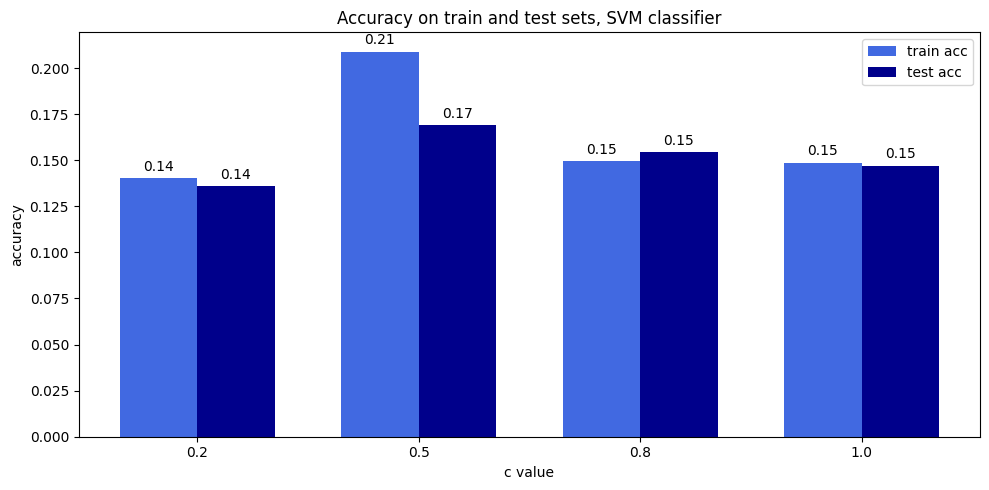

In [133]:
bar_width = 0.35
x_pos = range(len(c_vect))

fig, ax = plt.subplots(figsize=(10, 5))

train_bars = ax.bar(x_pos, acc_train_vect_svm, width=bar_width, label='train acc', color='royalblue')
test_bars = ax.bar([pos + bar_width for pos in x_pos], acc_test_vect_svm, width=bar_width, label='test acc', color='darkblue')

ax.set_xticks([pos + bar_width / 2 for pos in x_pos])
ax.set_xticklabels(c_vect)

ax.set_xlabel('c value')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy on train and test sets, SVM classifier')
ax.legend()

# function to add text labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# add labels on top of the bars
add_labels(train_bars)
add_labels(test_bars)

plt.tight_layout()
plt.show()


### Multi Layer Perceptron (MLP) using Keras Sequential Model

##### Preparing the data

In [7]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [14]:
y_train.shape

(1096, 10)

In [17]:
x_train_s = X_train.astype('float32')
x_test_s = X_test.astype('float32')
x_train_s /= 255
x_test_s /= 255

# # break training set into training and validation sets
# break training set into training and validation sets
(x_train_s, x_valid_s) = x_train_s[80:], x_train_s[:80]
(y_train_s, y_valid_s) = y_train[80:], y_train[:80]

# print shape of training set
print('x_train shape:', x_train_s.shape)

# print number of training, validation, and test images
print(x_train_s.shape[0], 'train samples')
print(x_test_s.shape[0], 'test samples')
print(x_valid_s.shape[0], 'validation samples')

x_train shape: (1016, 300, 400, 3)
1016 train samples
272 test samples
80 validation samples


In [9]:
y_train.shape

(1096, 10)

##### Building and training the MLP

In [10]:
# model architecture
model = Sequential()
model.add(Flatten(input_shape = x_train_s.shape[1:]))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 360000)            0         
                                                                 
 dense (Dense)               (None, 150)               54000150  
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 54016260 (206.06 MB)
Trainable params: 540

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [18]:
mlp_start = time.time()

checkpointer = ModelCheckpoint(filepath='MLP.best_weights.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train_s, y_train_s, batch_size=32, epochs=30,
          validation_data=(x_valid_s, y_valid_s), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

mlp_end = time.time()
mlp_took = mlp_end -mlp_start
print("took %s seconds"%(mlp_took))

Epoch 1/30

Epoch 1: val_loss improved from inf to 3.71174, saving model to MLP.best_weights.hdf5
32/32 - 36s - loss: 1.2877 - accuracy: 0.5699 - val_loss: 3.7117 - val_accuracy: 0.0000e+00 - 36s/epoch - 1s/step
Epoch 2/30

Epoch 2: val_loss improved from 3.71174 to 2.75444, saving model to MLP.best_weights.hdf5
32/32 - 26s - loss: 1.1869 - accuracy: 0.5945 - val_loss: 2.7544 - val_accuracy: 0.0300 - 26s/epoch - 820ms/step
Epoch 3/30

Epoch 3: val_loss improved from 2.75444 to 2.09352, saving model to MLP.best_weights.hdf5
32/32 - 31s - loss: 1.1141 - accuracy: 0.6270 - val_loss: 2.0935 - val_accuracy: 0.0800 - 31s/epoch - 969ms/step
Epoch 4/30

Epoch 4: val_loss improved from 2.09352 to 1.94210, saving model to MLP.best_weights.hdf5
32/32 - 39s - loss: 1.0652 - accuracy: 0.6476 - val_loss: 1.9421 - val_accuracy: 0.3000 - 39s/epoch - 1s/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.94210
32/32 - 31s - loss: 0.9930 - accuracy: 0.6860 - val_loss: 2.5517 - val_accuracy: 0.1000

In [19]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.best_weights.hdf5')
#Predict and Evaluate
y_test_pred_mlp = model.predict(x_test_s)
y_test_pred_mlp = np.argmax (y_test_pred_mlp, axis = 1)
y_test= np.argmax(y_test, axis=1)


y_train_pred_mlp = model.predict(x_train_s)
y_train_pred_mlp = np.argmax (y_train_pred_mlp, axis = 1)
y_train=np.argmax(y_train, axis=1)

32/32 [==============================] - 6s 157ms/step


In [20]:
def evaluate_mlp(y_train_pred, y_test_pred,y_train  = y_train[80:]):
    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    if (len(np.unique(y_train_pred))==10):
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    if (len(np.unique(y_test_pred))==10):
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    plt.show()

########################################
Accuracy on train:  0.8523622047244095
Accuracy on test:  0.49264705882352944
########################################
Recall on train:  0.8475180009945097
Recall on test:  0.49000407000407
########################################
Precision on train:  0.8695848554274193
Precision on test:  0.4994773260328329
########################################


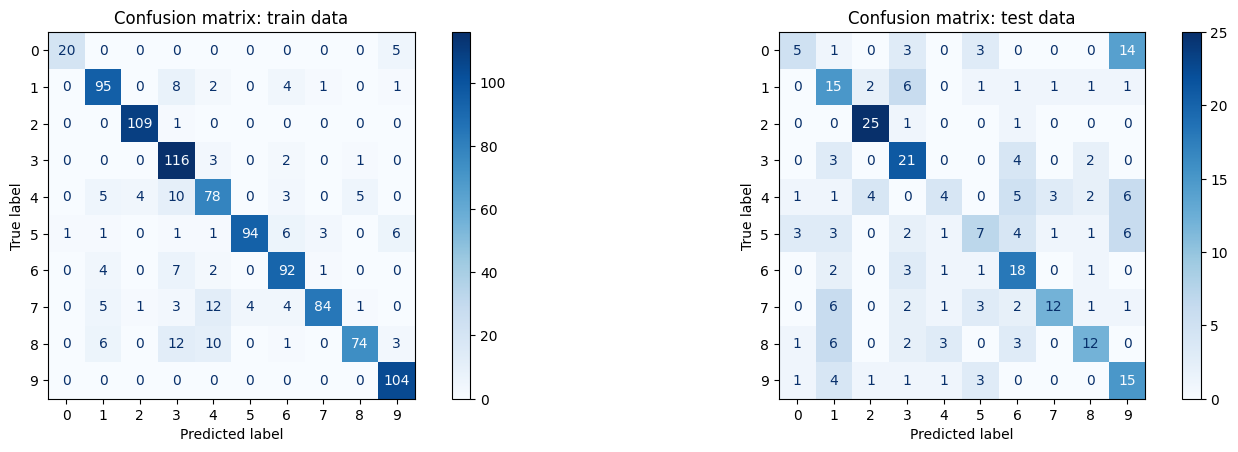

In [22]:
evaluate_mlp(y_train_pred_mlp, y_test_pred_mlp)